In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('i love you.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.111192,0.649461,8.520150e-08,0.159286,0.668651,-0.004129,0.231925,0.634245,-0.017261,0.288322,...,0.205619,0.505842,-0.076697,0.181348,0.549879,-0.063364,0.153745,0.541683,-0.047367,i love you
1,0.122975,0.639801,7.813919e-08,0.169658,0.657506,-0.002852,0.240423,0.620581,-0.014506,0.294096,...,0.214013,0.493323,-0.075152,0.190548,0.537028,-0.062634,0.164327,0.531536,-0.046985,i love you
2,0.596679,0.639851,-7.528934e-07,0.534453,0.647632,-0.000224,0.465972,0.620196,-0.004888,0.415564,...,0.478676,0.507011,-0.060931,0.501684,0.547054,-0.052141,0.528120,0.536793,-0.039706,i love you
3,0.129565,0.631636,1.770493e-07,0.176825,0.647747,-0.004852,0.244270,0.614506,-0.019469,0.298752,...,0.227048,0.492529,-0.072554,0.200190,0.532603,-0.059878,0.172467,0.524191,-0.043821,i love you
4,0.591499,0.639589,-7.212008e-07,0.531525,0.647378,-0.001065,0.464828,0.623680,-0.007002,0.415665,...,0.480988,0.504025,-0.060524,0.503530,0.545155,-0.051041,0.528619,0.535811,-0.038538,i love you
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.087144,0.771242,9.390531e-08,0.141856,0.782686,-0.000141,0.215984,0.746433,-0.014926,0.275291,...,0.185941,0.622547,-0.086588,0.160551,0.668572,-0.070476,0.130489,0.658024,-0.052958,i love you
295,0.086473,0.756291,1.442987e-08,0.143597,0.772690,-0.001269,0.215834,0.738293,-0.014243,0.271582,...,0.188581,0.607162,-0.082705,0.162335,0.653698,-0.067497,0.134357,0.645782,-0.049397,i love you
296,0.094950,0.734572,1.095605e-07,0.146646,0.750769,-0.006682,0.218165,0.718941,-0.023904,0.276337,...,0.187732,0.590383,-0.079264,0.164124,0.634015,-0.064871,0.136410,0.627129,-0.047953,i love you
297,0.105585,0.693038,1.267616e-07,0.151016,0.714833,-0.013260,0.218200,0.682361,-0.033090,0.276097,...,0.189499,0.547282,-0.075668,0.166803,0.591252,-0.061380,0.139615,0.585609,-0.044668,i love you


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.111192,0.649461,8.520150e-08,0.159286,0.668651,-0.004129,0.231925,0.634245,-0.017261,0.288322,...,0.205619,0.505842,-0.076697,0.181348,0.549879,-0.063364,0.153745,0.541683,-0.047367,i love you
1,0.122975,0.639801,7.813919e-08,0.169658,0.657506,-0.002852,0.240423,0.620581,-0.014506,0.294096,...,0.214013,0.493323,-0.075152,0.190548,0.537028,-0.062634,0.164327,0.531536,-0.046985,i love you
2,0.596679,0.639851,-7.528934e-07,0.534453,0.647632,-0.000224,0.465972,0.620196,-0.004888,0.415564,...,0.478676,0.507011,-0.060931,0.501684,0.547054,-0.052141,0.528120,0.536793,-0.039706,i love you
3,0.129565,0.631636,1.770493e-07,0.176825,0.647747,-0.004852,0.244270,0.614506,-0.019469,0.298752,...,0.227048,0.492529,-0.072554,0.200190,0.532603,-0.059878,0.172467,0.524191,-0.043821,i love you
4,0.591499,0.639589,-7.212008e-07,0.531525,0.647378,-0.001065,0.464828,0.623680,-0.007002,0.415665,...,0.480988,0.504025,-0.060524,0.503530,0.545155,-0.051041,0.528619,0.535811,-0.038538,i love you
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.087144,0.771242,9.390531e-08,0.141856,0.782686,-0.000141,0.215984,0.746433,-0.014926,0.275291,...,0.185941,0.622547,-0.086588,0.160551,0.668572,-0.070476,0.130489,0.658024,-0.052958,i love you
295,0.086473,0.756291,1.442987e-08,0.143597,0.772690,-0.001269,0.215834,0.738293,-0.014243,0.271582,...,0.188581,0.607162,-0.082705,0.162335,0.653698,-0.067497,0.134357,0.645782,-0.049397,i love you
296,0.094950,0.734572,1.095605e-07,0.146646,0.750769,-0.006682,0.218165,0.718941,-0.023904,0.276337,...,0.187732,0.590383,-0.079264,0.164124,0.634015,-0.064871,0.136410,0.627129,-0.047953,i love you
297,0.105585,0.693038,1.267616e-07,0.151016,0.714833,-0.013260,0.218200,0.682361,-0.033090,0.276097,...,0.189499,0.547282,-0.075668,0.166803,0.591252,-0.061380,0.139615,0.585609,-0.044668,i love you


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (299, 63)
Labels shape = (299,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['i love you', 'home', 'i love you', 'i love you', 'i love you',
       'home', 'i love you', 'i love you', 'i love you', 'home',
       'i love you', 'i love you', 'home', 'i love you', 'i love you',
       'i love you', 'i love you', 'i love you', 'i love you',
       'i love you', 'home', 'home', 'home', 'home', 'i love you', 'home',
       'home', 'i love you', 'i love you', 'i love you', 'i love you',
       'i love you', 'i love you', 'home', 'i love you', 'home', 'home',
       'home', 'i love you', 'i love you', 'i love you', 'i love you',
       'i love you', 'i love you', 'i love you', 'home', 'i love you',
       'i love you', 'i love you', 'i love you', 'i love you',
       'i love you', 'home', 'home', 'i love you', 'i love you', 'home',
       'i love you', 'i love you', 'home'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

In [8]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
print("Training score =", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
print("Testing score =", accuracy_score(y_test, y_pred))

Training score = 1.0
Testing score = 1.0


<AxesSubplot:title={'center':'Confusion Matrix - Turkey Sign Language'}>

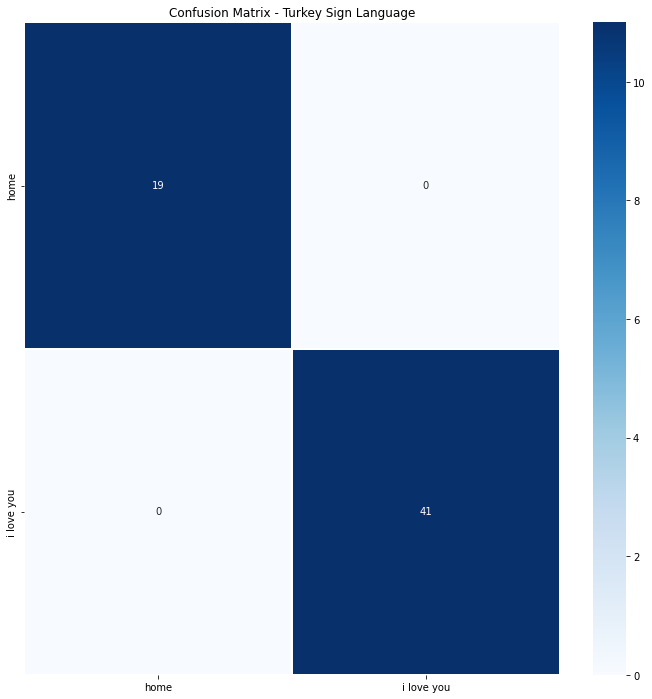

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Turkey Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=11,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('love.pkl','wb') as f:
    pickle.dump(svm,f)